In [5]:
import tensorflow as tf
!pip install tensorflow==2.9.1
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.9.1


In [6]:
print(tf.__version__)

2.9.1


In [7]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import splitfolders

In [10]:
input_folder="/content/drive/MyDrive/dummy_sugarcane"
output="/content/final"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.8,.1,.1))

Copying files: 1500 files [00:06, 215.60 files/s]


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image

In [12]:
img_height,img_width=224,224
batch_size=32
train='/content/final/val'
valid='/content/final/train'
test='/content/final/test'

In [13]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 1200 files for training.


In [14]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 300 files for validation.


In [15]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras import Model

In [16]:
base_model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [17]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation="sigmoid")(x)
model_final = Model(base_model.input,predictions)

In [19]:
model_final.compile('rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
epochs=5
history=model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
38/38 [==============================] - 201s 5s/step - loss: 3.2801 - accuracy: 0.7367 - val_loss: 0.4243 - val_accuracy: 0.9133
Epoch 2/5
38/38 [==============================] - 186s 5s/step - loss: 0.5228 - accuracy: 0.8875 - val_loss: 0.3022 - val_accuracy: 0.9167
Epoch 3/5
38/38 [==============================] - 180s 5s/step - loss: 0.4477 - accuracy: 0.9083 - val_loss: 0.2025 - val_accuracy: 0.9267
Epoch 4/5
38/38 [==============================] - 181s 5s/step - loss: 0.2258 - accuracy: 0.9433 - val_loss: 0.5985 - val_accuracy: 0.8800
Epoch 5/5
38/38 [==============================] - 190s 5s/step - loss: 0.2075 - accuracy: 0.9583 - val_loss: 0.6130 - val_accuracy: 0.9067


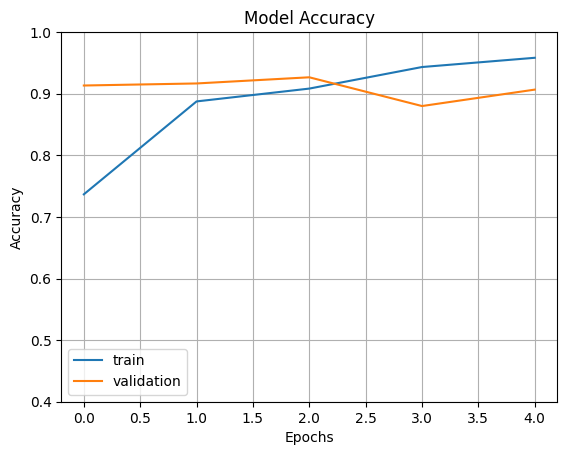

In [21]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [22]:
model_final.evaluate(val_ds)

10/10 [==============================] - 27s 3s/step - loss: 0.6130 - accuracy: 0.9067


[0.6129826307296753, 0.9066666960716248]

In [23]:
print(tf. __version__)

2.9.1


In [24]:
model_final.save('efficientnet_m')

In [25]:
loaded_1 = tf.keras.models.load_model("efficientnet_m")


In [26]:
tf.keras.models.save_model(model_final,'/content/drive/MyDrive/efficientnet_m.h5')